In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

sleeping_patterns = pd.read_csv('sleeping_patterns.csv')
sleeping_patterns.columns = sleeping_patterns.columns.str.replace(' ', '_').str.lower()
print(sleeping_patterns.head(5))

   person_id gender  age            occupation  sleep_duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   quality_of_sleep  physical_activity_level  stress_level bmi_category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  blood_pressure  heart_rate  daily_steps sleep_disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [4]:
#инфа по датасету
end_str = '\n' + '=' * 50 + '\n'

print(sleeping_patterns.info(), end=end_str)

#строки столбцы
print(sleeping_patterns.shape, end=end_str)
#
print(sleeping_patterns['sleep_disorder'].describe(include='all'), end=end_str)
print(sleeping_patterns['sleep_disorder'].describe(), end=end_str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   person_id                374 non-null    int64  
 1   gender                   374 non-null    object 
 2   age                      374 non-null    int64  
 3   occupation               374 non-null    object 
 4   sleep_duration           374 non-null    float64
 5   quality_of_sleep         374 non-null    int64  
 6   physical_activity_level  374 non-null    int64  
 7   stress_level             374 non-null    int64  
 8   bmi_category             374 non-null    object 
 9   blood_pressure           374 non-null    object 
 10  heart_rate               374 non-null    int64  
 11  daily_steps              374 non-null    int64  
 12  sleep_disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None
(374, 13)
count  

In [5]:
#Очистка от дубликатов и пропусков
if sleeping_patterns.duplicated().any():
    print(f'🔁 Найдено {sleeping_patterns.duplicated().sum()} дубликатов.')
    df = sleeping_patterns.drop_duplicates().reset_index(drop=True)
    print('✅ Дубликаты удалены.')
else:
    print('👌 Дубликатов не найдено.')

print(sleeping_patterns.isna().sum())

sleeping_patterns['sleep_disorder'] = sleeping_patterns['sleep_disorder'].fillna('normal')


👌 Дубликатов не найдено.
person_id                    0
gender                       0
age                          0
occupation                   0
sleep_duration               0
quality_of_sleep             0
physical_activity_level      0
stress_level                 0
bmi_category                 0
blood_pressure               0
heart_rate                   0
daily_steps                  0
sleep_disorder             219
dtype: int64


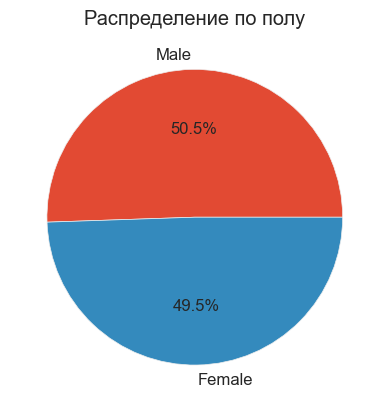

In [6]:
#1 Распределение по полу
gender_series = sleeping_patterns['gender'].value_counts()

plt.figure()
plt.pie(
    gender_series.values,
    labels=gender_series.index,
    autopct='%1.1f%%',  # покажет проценты
    textprops={'fontsize': 12}
)
plt.title('Распределение по полу')
plt.show()


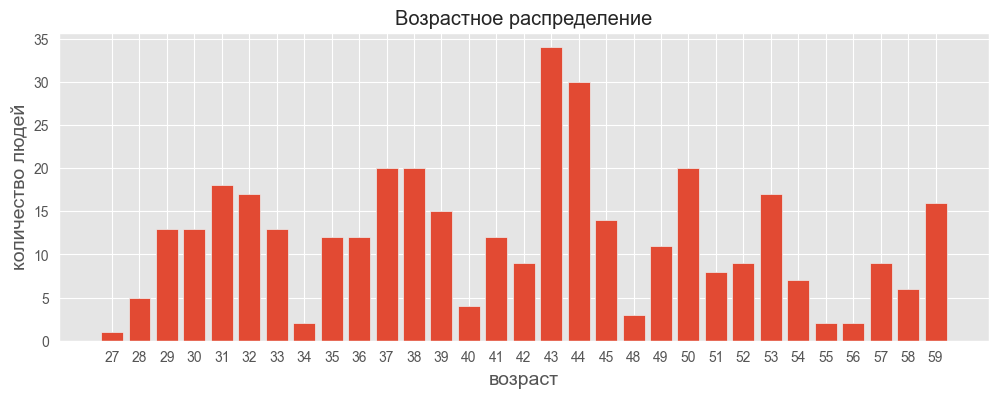

In [7]:
#2 Возрастное распределение
age_series = sleeping_patterns['age'].value_counts()
age_series.sort_index(inplace=True)

plt.figure(figsize=(12, 4))
plt.bar(age_series.index.astype(str), age_series.values)
plt.title('Возрастное распределение')
plt.xlabel('возраст', fontsize=14)
plt.ylabel('количество людей', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

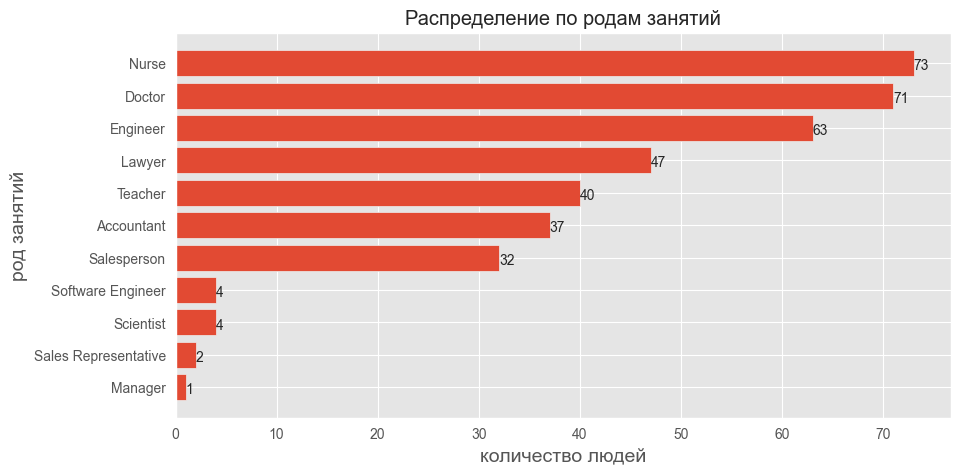

In [8]:
#3 Распределение по родам занятий
occupation_series = sleeping_patterns['occupation'].value_counts(ascending=True)

plt.figure(figsize=(10, 5))
# occupation_series = occupation_series.rename(index={'Nurse': 'медсестра'})
plt.barh(occupation_series.index, occupation_series.values)
plt.title('Распределение по родам занятий')
plt.ylabel('род занятий', fontsize=14)
plt.xlabel('количество людей', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i, v in enumerate(occupation_series.values):
    plt.text(v, i - 0.2, str(v), fontsize=10)

plt.show()


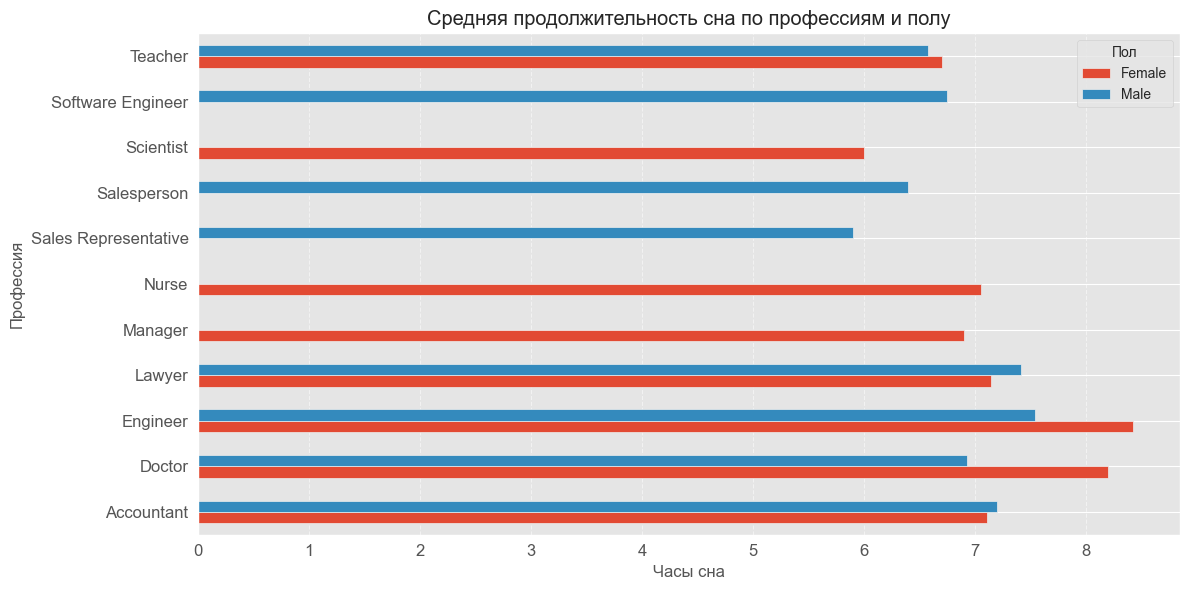

In [9]:
#4 Средняя продолжительность сна по полу и профессии — столбчатая диаграмма.
#1pivot
pivot_group = sleeping_patterns.groupby(['gender', 'occupation'])['sleep_duration'].mean().round(2)
pivot_group = pivot_group.reset_index()
pivot_group = pivot_group.pivot(index='occupation', columns='gender', values='sleep_duration')

#1pivot_table
group = sleeping_patterns.pivot_table(
    index='occupation',
    columns='gender',
    values='sleep_duration',
    aggfunc=lambda x: x.mean().round(2)
)
# print(group)

# Горизонтальная столбчатая диаграмма
group.plot(kind='barh', figsize=(12, 6))

plt.title('Средняя продолжительность сна по профессиям и полу')
plt.xlabel('Часы сна')
plt.ylabel('Профессия')
plt.legend(title='Пол')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


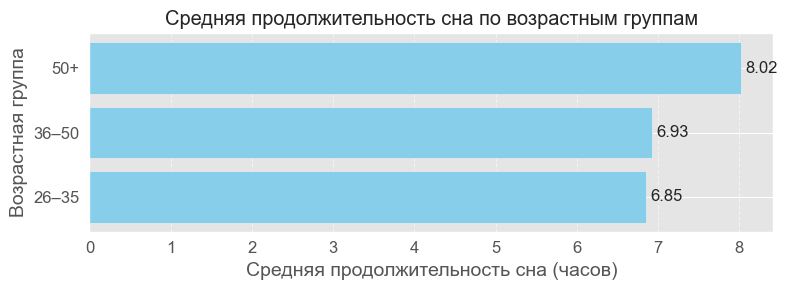

In [10]:
#5 Среднее качество сна по возрастным группам — сравнение 18–25, 26–35, 36–50, 50+.
age_tb = sleeping_patterns[['age', 'sleep_duration']].copy()


def get_group_age(age: int) -> str:
    if age < 26:
        return '18–25'
    if age < 36:
        return '26–35'
    if age < 51:
        return '36–50'
    return '50+'


age_tb['group_age'] = age_tb['age'].apply(func=get_group_age)
res = age_tb.groupby('group_age')['sleep_duration'].mean().round(2)

# Горизонтальная столбчатая диаграмма
plt.figure(figsize=(8, 3))
plt.barh(res.index, res.values, color='skyblue')
plt.title('Средняя продолжительность сна по возрастным группам')
plt.xlabel('Средняя продолжительность сна (часов)', fontsize=14)
plt.ylabel('Возрастная группа', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Подписи значений рядом со столбцами
for i, v in enumerate(res.values):
    plt.text(v + 0.05, i, str(v), va='center', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

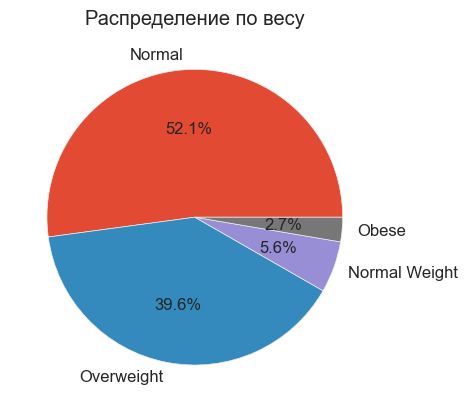

In [11]:
#6 Распределение по категориям ИМТ (норма, избыточный вес и т. д.) — круговая диаграмма.
bmi_tb = sleeping_patterns['bmi_category'].value_counts()

plt.figure()
plt.pie(
    bmi_tb.values,
    labels=bmi_tb.index,
    autopct='%1.1f%%',  # покажет проценты
    textprops={'fontsize': 12}
)
plt.title('Распределение по весу')
plt.show()

['Overweight' 'Normal' 'Obese' 'Normal Weight']
               mean_sleep  mean_pal  mean_steps
bmi_category                                   
Normal               7.39     57.69     6887.18
Normal Weight        7.33     60.33     6766.67
Obese                6.96     55.00     3350.00
Overweight           6.77     61.24     6965.54


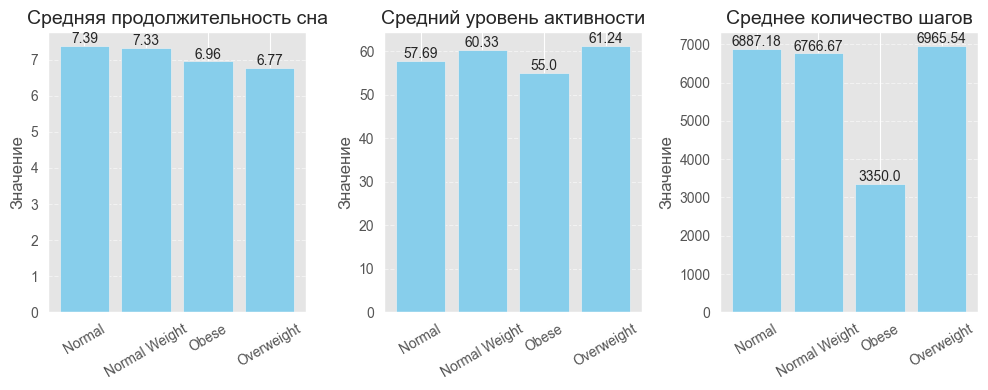

In [12]:
#7 среднее Продолжительность сна / Уровень физической активности и количество шагов у разных весовых категорий людей

print(sleeping_patterns.bmi_category.unique())
clear_tb = sleeping_patterns.groupby('bmi_category').agg(
    mean_sleep=('sleep_duration', lambda x: x.mean().round(2)),
    mean_pal=('physical_activity_level', lambda x: x.mean().round(2)),
    mean_steps=('daily_steps', lambda x: x.mean().round(2))
)

print(clear_tb)

# Список метрик и заголовков
metrics = ['mean_sleep', 'mean_pal', 'mean_steps']
titles = ['Средняя продолжительность сна', 'Средний уровень активности', 'Среднее количество шагов']

# Фигура с 3 графиками в ряд
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4), sharey=False)

for ax, metric, title in zip(axes, metrics, titles):
    ax.bar(clear_tb.index, clear_tb[metric], color='skyblue')
    ax.set_title(title, fontsize=14)
    ax.set_ylabel('Значение', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Поворот подписей через tick_params
    ax.tick_params(axis='x', rotation=30)

    # Подписи над столбцами
    for i, v in enumerate(clear_tb[metric].values):
        ax.text(i, v + max(clear_tb[metric].values) * 0.01, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [13]:
#8 Влияние лишнего веса на давление и сердечный ритм

#разделить давление на 2 колонки с цифрами
sleeping_patterns[['systolic', 'diastolic']] = sleeping_patterns['blood_pressure'].str.split('/', expand=True).astype(
    int)

#группируем и округляем
bmi_tb = sleeping_patterns.groupby('bmi_category').aggregate(
    {'systolic': 'mean', 'diastolic': 'mean', 'heart_rate': 'mean'})
bmi_tb = bmi_tb.assign(
    systolic=bmi_tb['systolic'].round(2),
    diastolic=bmi_tb['diastolic'].round(2),
    heart_rate=bmi_tb['heart_rate'].round(2)
)

#возвращаем столбец blood_pressure но уже средний - не нужно для визуала...
# bmi_tb['blood_pressure'] = bmi_tb['systolic'].astype(str) + '/' + bmi_tb['diastolic'].astype(str)
bmi_tb.sort_values('systolic', inplace=True)
print(bmi_tb)

               systolic  diastolic  heart_rate
bmi_category                                  
Normal Weight    121.62      80.00       71.29
Normal           123.82      80.67       68.73
Overweight       135.05      90.18       70.95
Obese            139.20      90.20       84.30


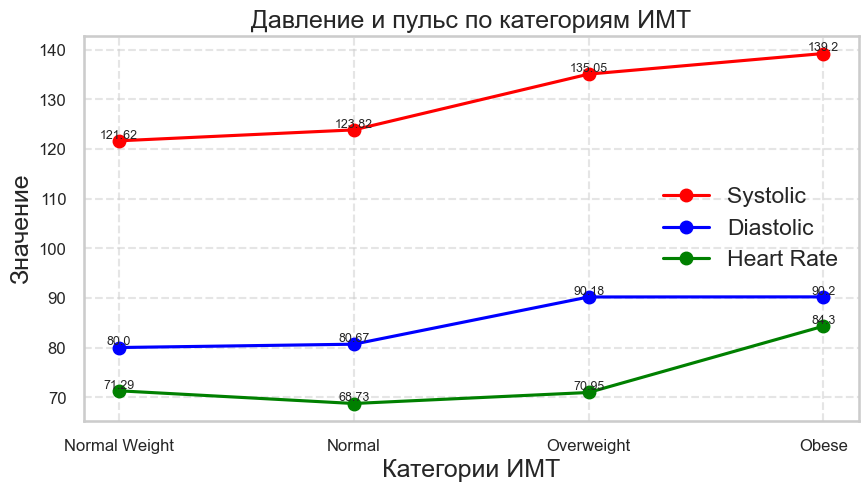

70.0
86
65


In [20]:
# Данные
categories = bmi_tb.index
systolic = bmi_tb['systolic']
diastolic = bmi_tb['diastolic']
heart_rate = bmi_tb['heart_rate']

plt.figure(figsize=(10, 5))

# Все три линии
plt.plot(categories, systolic, marker='o', color='red', label='Systolic')
plt.plot(categories, diastolic, marker='o', color='blue', label='Diastolic')
plt.plot(categories, heart_rate, marker='o', color='green', label='Heart Rate')

# Заголовок и подписи осей
plt.title('Давление и пульс по категориям ИМТ')
plt.xlabel('Категории ИМТ')
plt.ylabel('Значение')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Легенда
plt.legend()

# Подписи значений над точками
for i, (s, d, h) in enumerate(zip(systolic, diastolic, heart_rate)):
    plt.text(i, s + 0.5, str(s), ha='center', fontsize=9)
    plt.text(i, d + 0.5, str(d), ha='center', fontsize=9)
    plt.text(i, h + 0.5, str(h), ha='center', fontsize=9)

plt.show()

"""
выводы по данным
- с ростом веса  - растет давление 
- сердечный ритм - при ожирение - до этого в норме 
- сердечный ритм медиана 70.0 / самый большой 86 / самый малый 65 
"""

print(sleeping_patterns['heart_rate'].median())
print(sleeping_patterns['heart_rate'].max())
print(sleeping_patterns['heart_rate'].min())



In [15]:
#9 Проблемы со сном у разных профессий
problems_sleep_table = pd.crosstab(
    sleeping_patterns['occupation'],
    sleeping_patterns['sleep_disorder']
)
problems_sleep_table_perc = pd.crosstab(
    sleeping_patterns['occupation'],
    sleeping_patterns['sleep_disorder'],
    normalize='index'
) * 100

# print(problems_sleep_table, end=end_str)
# print(problems_sleep_table_perc, end=end_str)

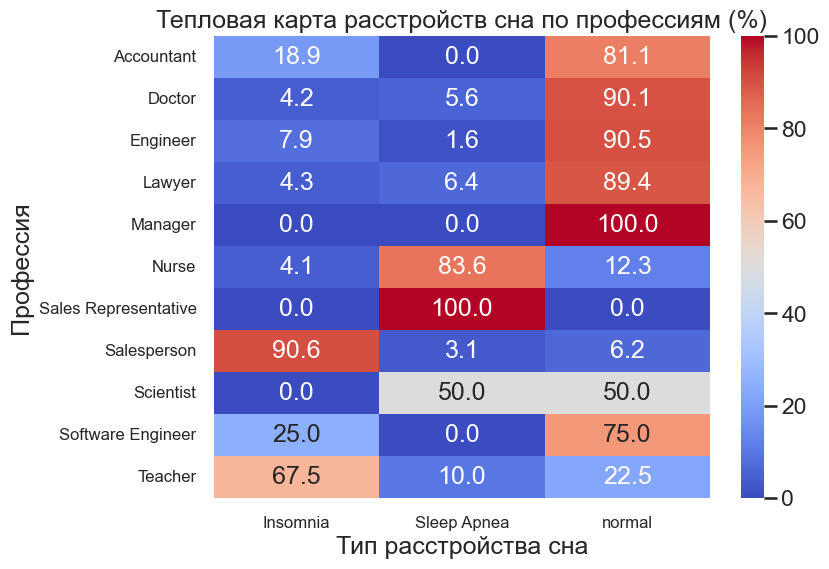

In [26]:
#Выводим таблицу в хотмапе
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
sns.set_context('talk')

plt.figure(figsize=(8, 6))
sns.heatmap(
    problems_sleep_table_perc,
    annot=True,
    fmt='.1f',
    cmap='coolwarm',
)

plt.title('Тепловая карта расстройств сна по профессиям (%)')
plt.xlabel('Тип расстройства сна')
plt.ylabel('Профессия')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [56]:
#10 Почему у большинства медсестер проблемы со сном
#сравню sleep_duration quality_of_sleep physical_activity_level daily_steps докторов с нормальным сном с медсестрами с проблемами

columns = ['sleep_duration', 'quality_of_sleep', 'physical_activity_level', 'daily_steps']

#1 здоровые доктора
doctor_masc = sleeping_patterns['occupation'] == 'Doctor'
doctor_tb = sleeping_patterns.loc[doctor_masc, columns].mean().round(2)
# print(doctor_tb)

#1 медсестры с  Sleep Apnea
nurse_masc = (sleeping_patterns['occupation'] == 'Nurse') & (sleeping_patterns['sleep_disorder'] == 'Sleep Apnea')
nurse_tb = sleeping_patterns.loc[nurse_masc, columns].mean().round(2)
# print(nurse_tb)

tb = pd.DataFrame({
    'doctors': doctor_tb,
    'nurses': nurse_tb
})

print(tb)

                         doctors   nurses
sleep_duration              6.97     7.08
quality_of_sleep            6.65     7.44
physical_activity_level    55.35    80.90
daily_steps              6808.45  8263.93


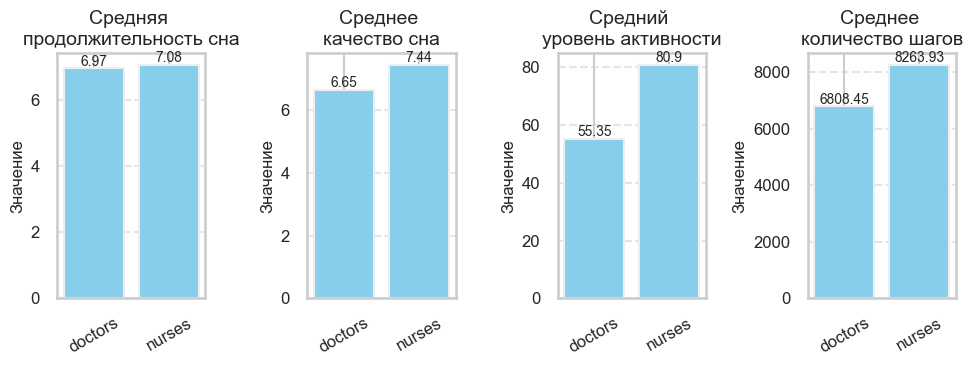

In [68]:
# Список метрик и заголовков
metrics = ['sleep_duration', 'quality_of_sleep', 'physical_activity_level', 'daily_steps']
titles = ['Средняя \nпродолжительность сна', 'Среднее \nкачество сна', 'Средний \nуровень активности', 'Среднее \nколичество шагов']

# # Фигура с 4 графиками в ряд
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 4), sharey=False)

for ax, metric, title in zip(axes, metrics, titles):
    ax.bar(tb.columns, tb.loc[metric], color='skyblue')  # tb.loc[metric] — значения по строке
    ax.set_title(title, fontsize=14)
    ax.set_ylabel('Значение', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Поворот подписей по оси X + размер шрифта
    ax.tick_params(axis='x', rotation=30, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)


    # Подписи над столбцами
    for i, v in enumerate(tb.loc[metric].values):
        ax.text(i, v + max(tb.loc[metric].values)*0.01, str(round(v,2)),
                ha='center', fontsize=10)

plt.tight_layout()
plt.show()